## 설치환경

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

## 01. 데이터 수집 및 로딩

In [2]:
df = pd.read_csv('../data/Sleep_health_and_lifestyle_dataset.csv')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


## 02. 데이터 구조 및 변수 이해

In [6]:
# 데이터 크기 확인 (행, 열)
print("데이터 크기 (행, 열):", df.shape)
print("\n" + "="*50 + "\n")

# 데이터 타입 확인
print("데이터 타입:")
df.info()
print("\n" + "="*50 + "\n")

# 처음 5개 행 샘플 확인
print("데이터 샘플 (처음 5개):")
print(df.head())
print("\n" + "="*50 + "\n")

# 마지막 5개 행 샘플 확인
print("데이터 샘플 (마지막 5개):")
print(df.tail())
print("\n" + "="*50 + "\n")

# 컬럼명 확인
print("컬럼명:")
print(df.columns)

데이터 크기 (행, 열): (374, 13)


데이터 타입:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usa

## 03. 데이터 요약 및 기술 통계

In [7]:
# 수치형 변수 기술 통계
print("수치형 변수 기술 통계:")
print(df.describe())
print("\n" + "="*50 + "\n")

# 범주형 변수 기술 통계
print("범주형 변수 기술 통계:")
print(df.describe(include='object'))
print("\n" + "="*50 + "\n")

# 주요 범주형 변수 분포 확인
categorical_cols = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']
for col in categorical_cols:
    print(f"\n--- {col} 분포 ---")
    print(df[col].value_counts())
    print(f"고유값 개수: {df[col].nunique()}")

수치형 변수 기술 통계:
        Person ID         Age  Sleep Duration  Quality of Sleep  \
count  374.000000  374.000000      374.000000        374.000000   
mean   187.500000   42.184492        7.132086          7.312834   
std    108.108742    8.673133        0.795657          1.196956   
min      1.000000   27.000000        5.800000          4.000000   
25%     94.250000   35.250000        6.400000          6.000000   
50%    187.500000   43.000000        7.200000          7.000000   
75%    280.750000   50.000000        7.800000          8.000000   
max    374.000000   59.000000        8.500000          9.000000   

       Physical Activity Level  Stress Level  Heart Rate   Daily Steps  
count               374.000000    374.000000  374.000000    374.000000  
mean                 59.171123      5.385027   70.165775   6816.844920  
std                  20.830804      1.774526    4.135676   1617.915679  
min                  30.000000      3.000000   65.000000   3000.000000  
25%              

## 04. 결측치 및 이상치 탐색

컬럼별 결측치 개수:
Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64


시각화할 수치형 변수 개수: 7
수치형 변수 목록: ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']


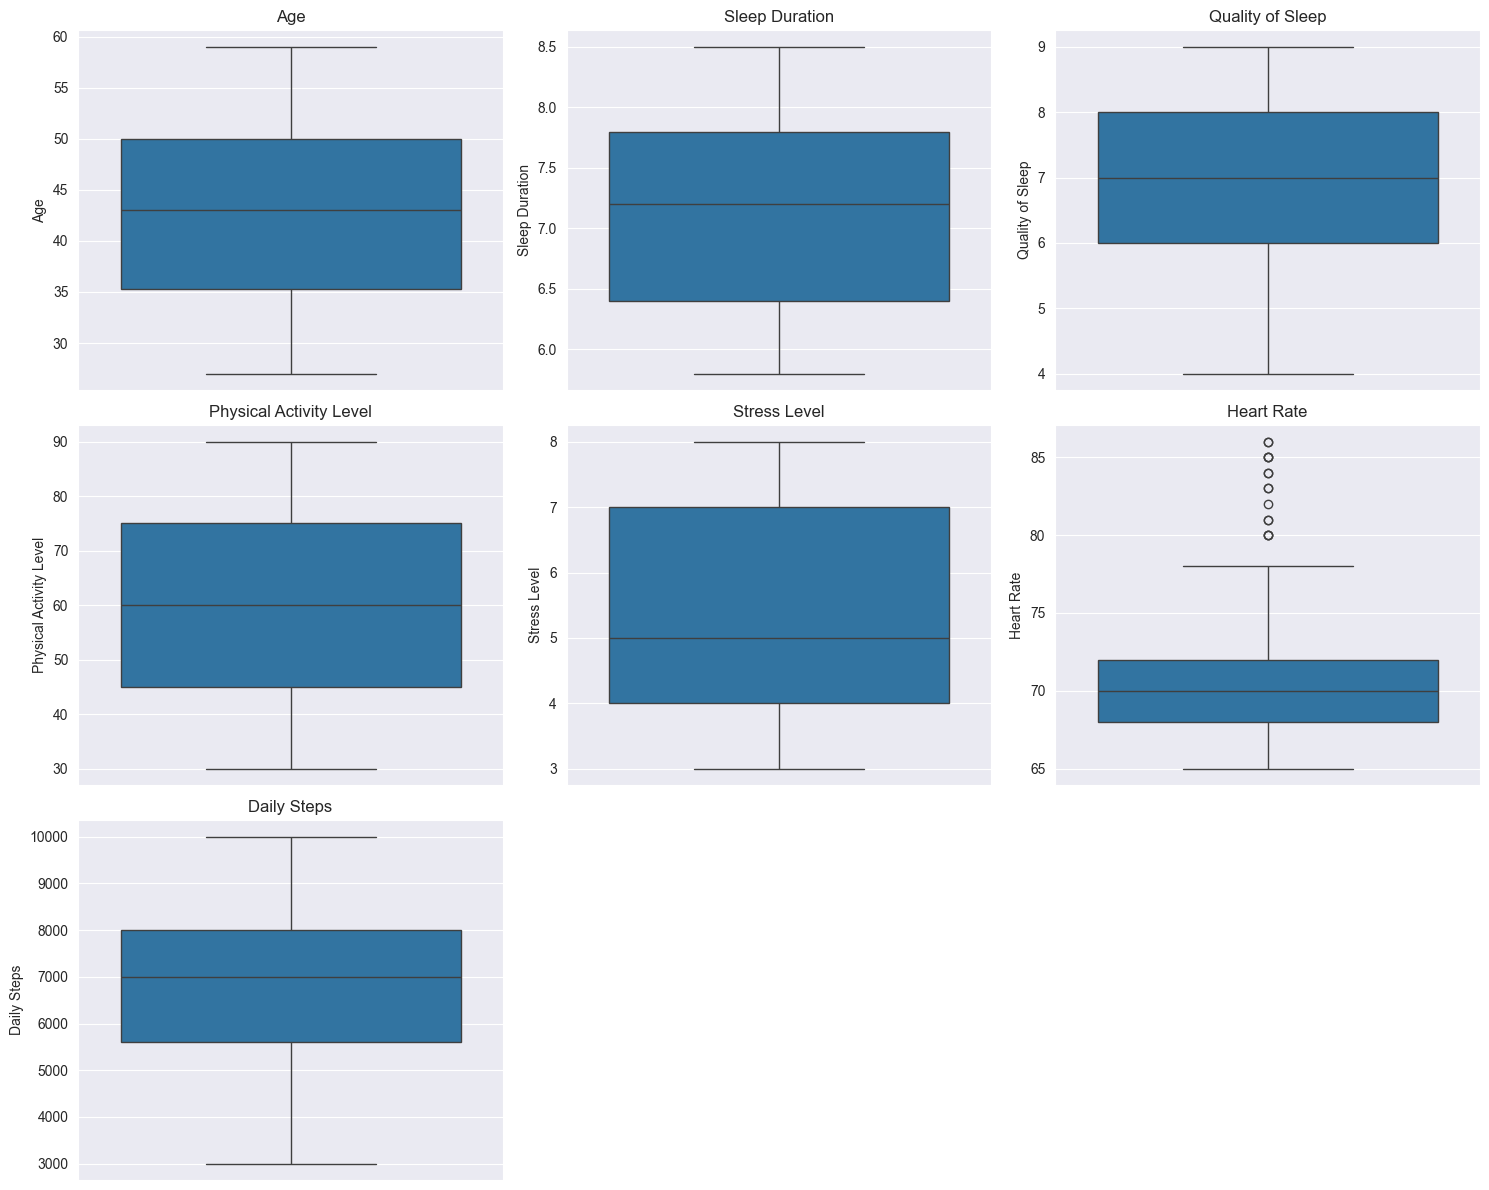

In [9]:
# 결측치 확인
print("컬럼별 결측치 개수:")
print(df.isnull().sum())
print("\n" + "="*50 + "\n")

# 이상치 탐색 (수치형 변수에 대한 Boxplot)
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
# 'Person ID'는 식별자이므로 제외 (이전에 이미 df에서 drop했다면 이 부분은 불필요할 수 있습니다)
if 'Person ID' in numerical_cols:
    numerical_cols.remove('Person ID')

# 수치형 변수의 개수를 확인
num_numerical_cols = len(numerical_cols)
print(f"시각화할 수치형 변수 개수: {num_numerical_cols}")
print(f"수치형 변수 목록: {numerical_cols}")


# 그리드 크기를 동적으로 설정하거나 충분히 크게 설정
# 예: 3열로 고정하고 행의 수를 계산
ncols_plot = 3
nrows_plot = (num_numerical_cols + ncols_plot - 1) // ncols_plot # 올림 나눗셈으로 필요한 행 수 계산

if num_numerical_cols > 0:
    plt.figure(figsize=(5 * ncols_plot, 4 * nrows_plot)) # figsize도 동적으로 조절
    for i, col in enumerate(numerical_cols):
        plt.subplot(nrows_plot, ncols_plot, i + 1) # 수정된 부분
        sns.boxplot(y=df[col])
        plt.title(col)
    plt.tight_layout()
    plt.show()
else:
    print("시각화할 수치형 변수가 없습니다.")

## 05. 변수 분포 시각화

C:\Users\isdjf\AppData\Local\Temp\ipykernel_3224\1959095720.py:13: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\isdjf\AppData\Local\Temp\ipykernel_3224\1959095720.py:13: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\isdjf\anaconda3\envs\ai_basic_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\isdjf\anaconda3\envs\ai_basic_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


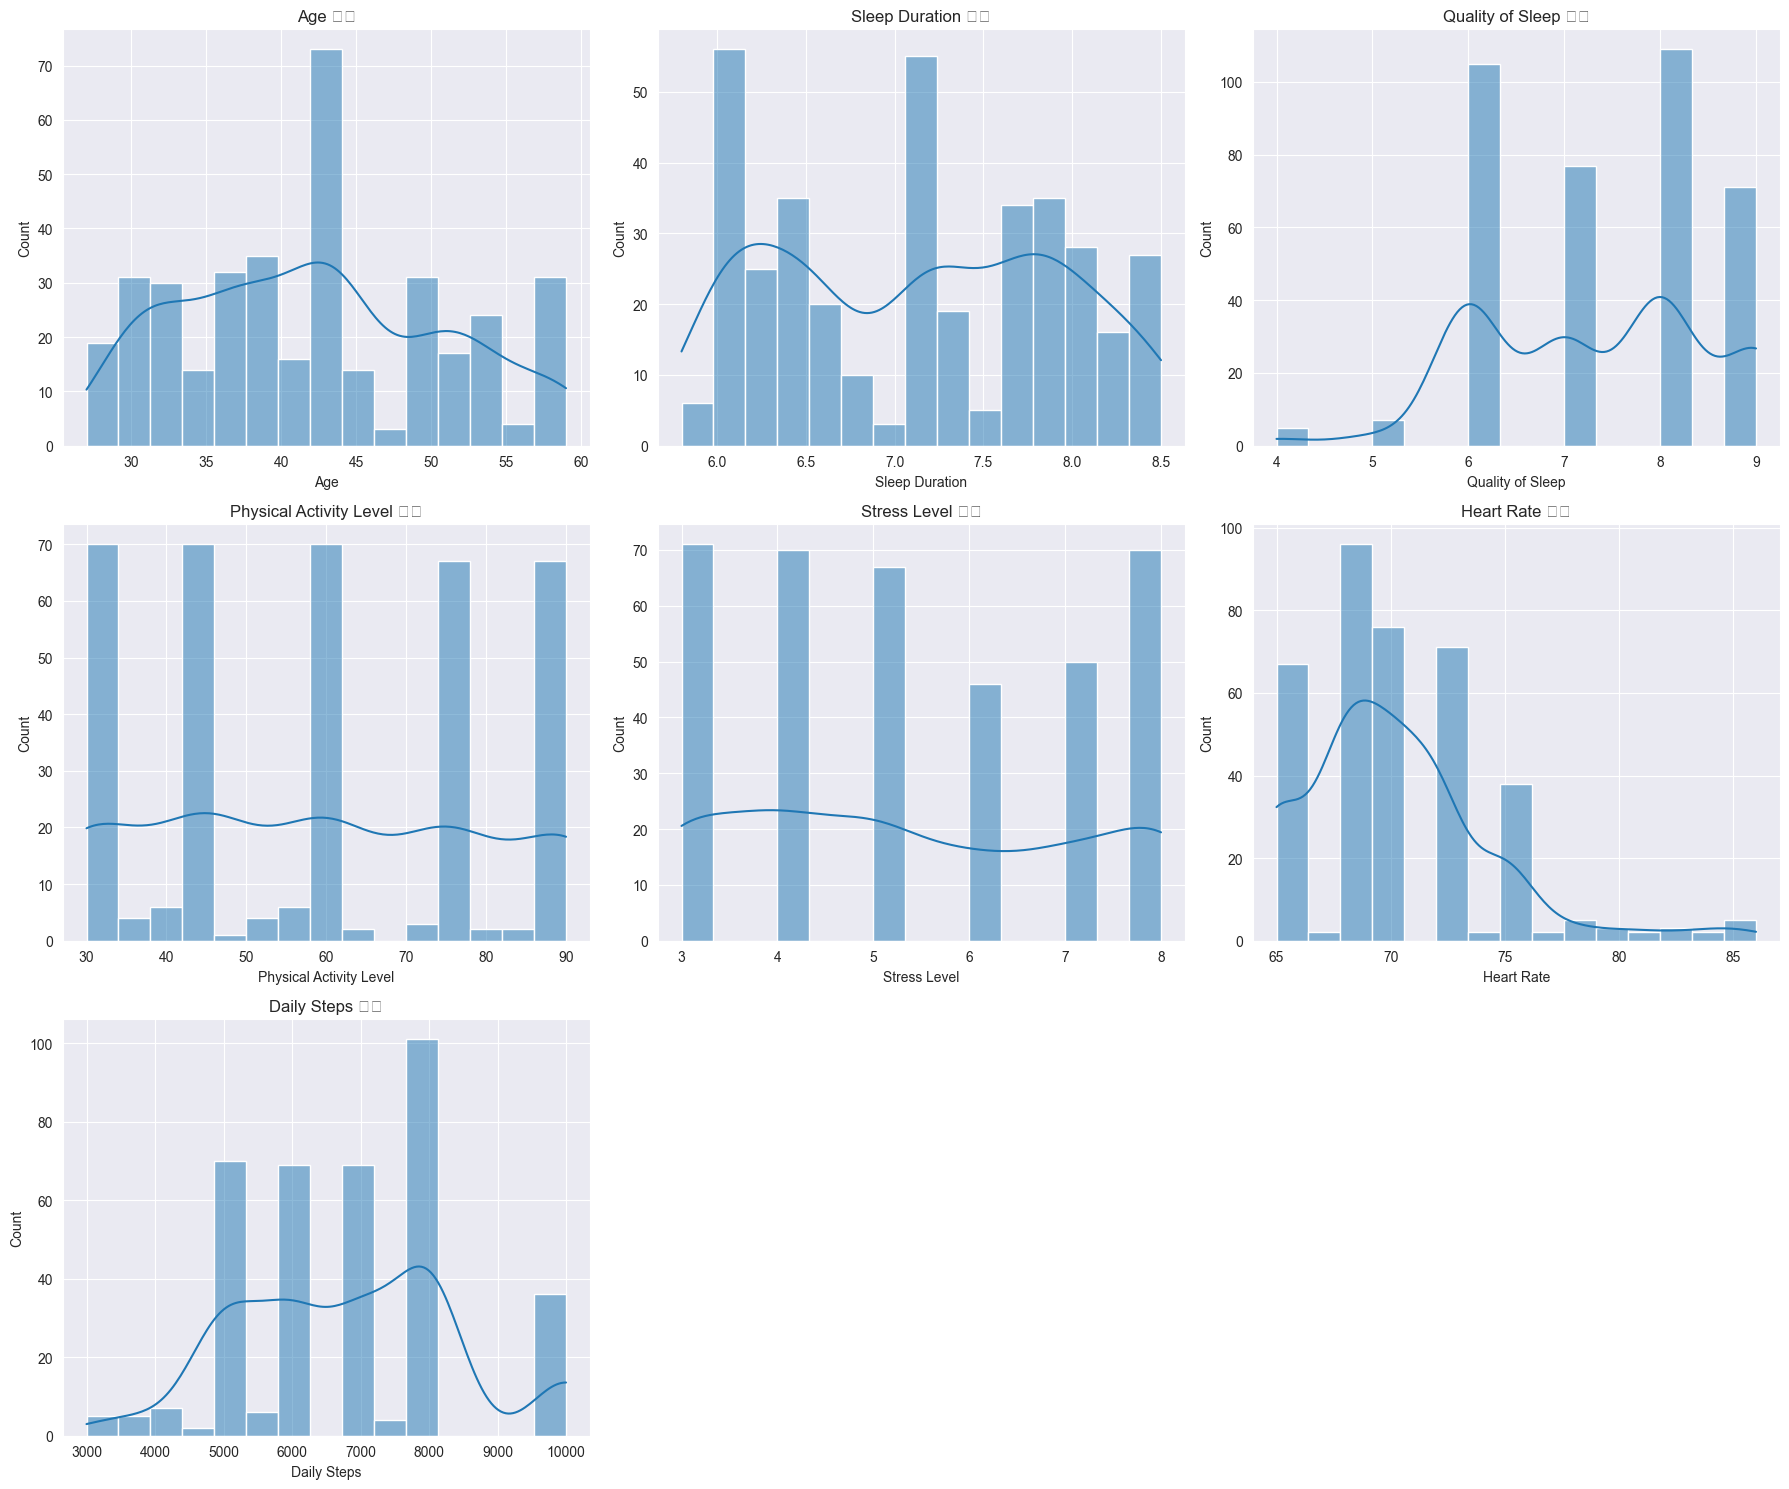

C:\Users\isdjf\AppData\Local\Temp\ipykernel_3224\1959095720.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order = df[col].value_counts().index, palette='viridis') # y축으로 변경하여 가독성 향상
C:\Users\isdjf\AppData\Local\Temp\ipykernel_3224\1959095720.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order = df[col].value_counts().index, palette='viridis') # y축으로 변경하여 가독성 향상
C:\Users\isdjf\AppData\Local\Temp\ipykernel_3224\1959095720.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order = df[col].v

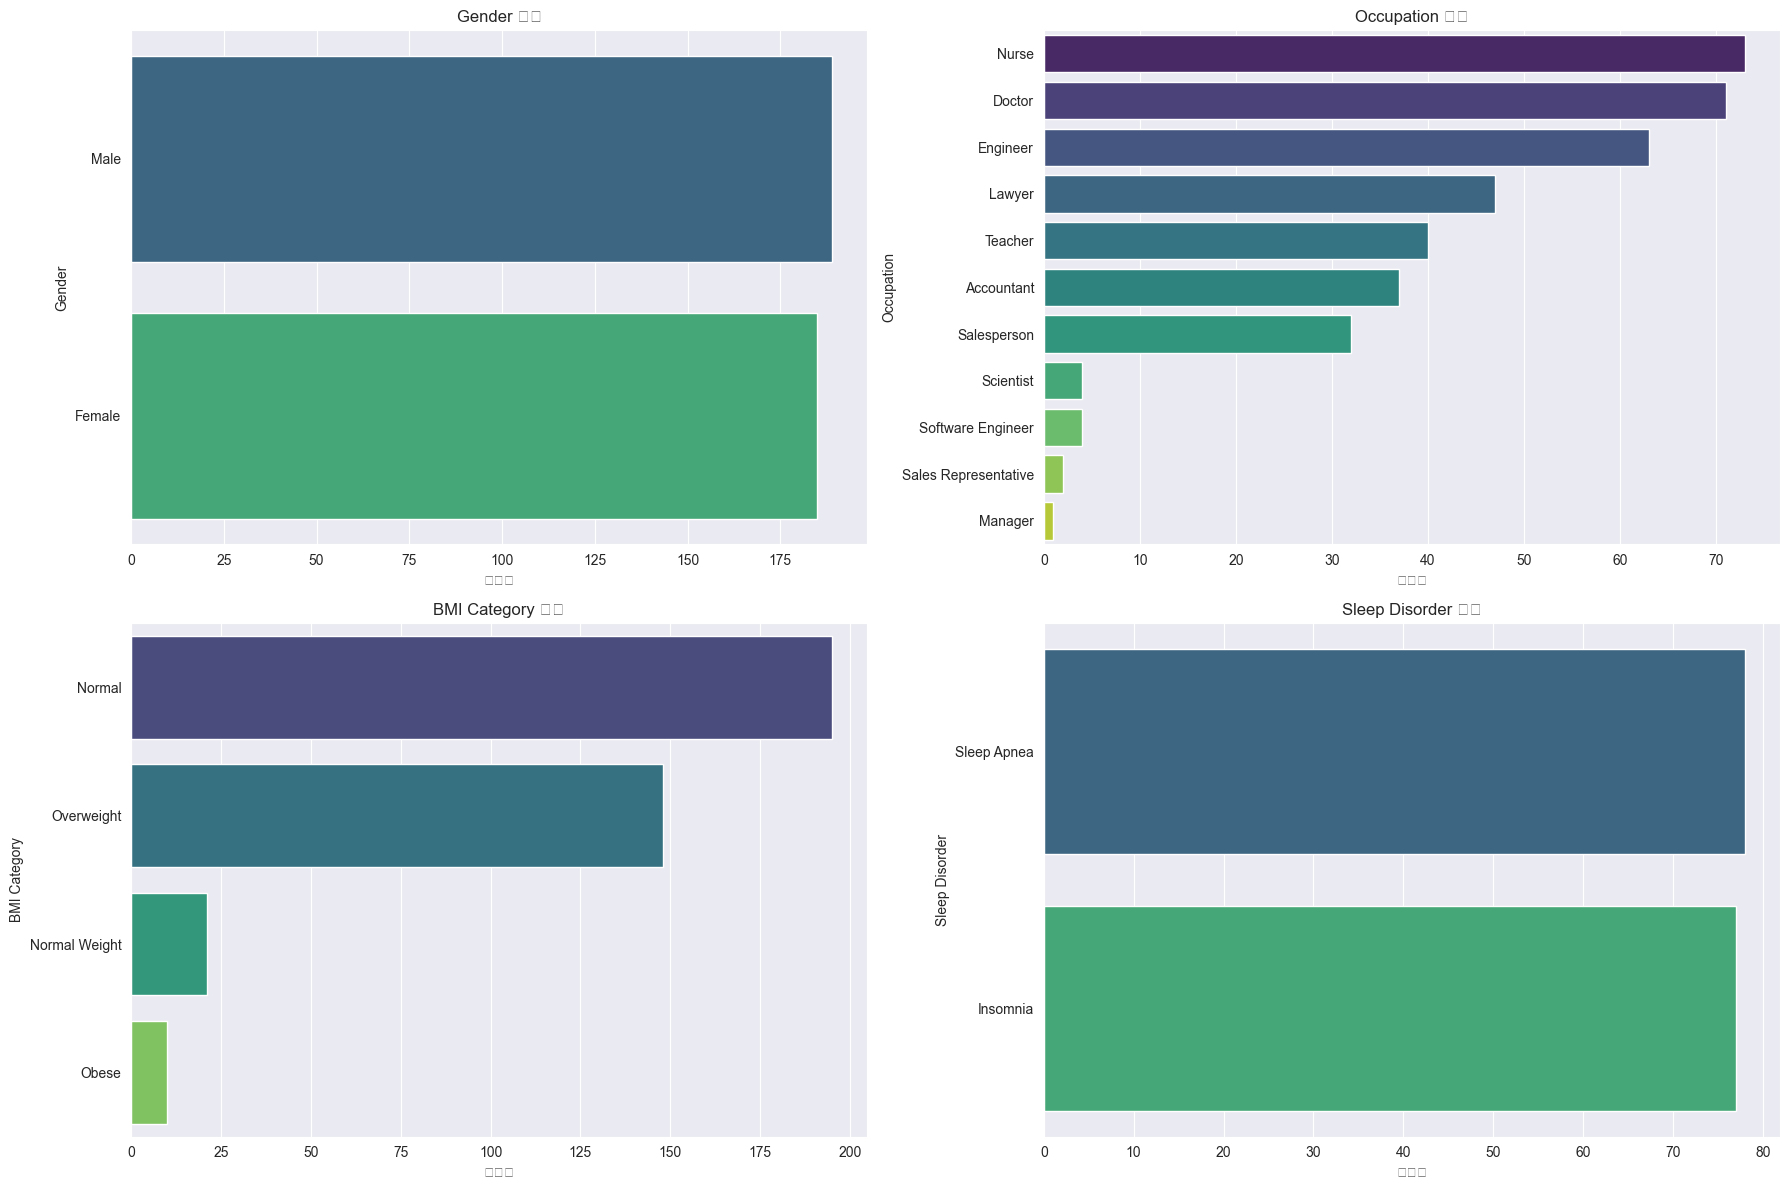

In [11]:
num_numerical_cols = len(numerical_cols) # 04번에서 이미 정의됨

# 그리드 크기를 동적으로 설정하거나 충분히 크게 설정
ncols_plot_hist = 3
nrows_plot_hist = (num_numerical_cols + ncols_plot_hist - 1) // ncols_plot_hist

if num_numerical_cols > 0:
    plt.figure(figsize=(6 * ncols_plot_hist, 5 * nrows_plot_hist)) # figsize도 동적으로 조절
    for i, col in enumerate(numerical_cols):
        plt.subplot(nrows_plot_hist, ncols_plot_hist, i + 1) # 수정된 부분
        sns.histplot(df[col], kde=True, bins=15)
        plt.title(f'{col} 분포')
    plt.tight_layout()
    plt.show()
else:
    print("시각화할 수치형 변수가 없습니다.")
print("\n" + "="*50 + "\n")

# 범주형 변수 분포 시각화 (Count plot)
categorical_cols_for_plot = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']
plt.figure(figsize=(18, 12))
for i, col in enumerate(categorical_cols_for_plot):
    plt.subplot(2, 2, i + 1)
    sns.countplot(y=df[col], order = df[col].value_counts().index, palette='viridis') # y축으로 변경하여 가독성 향상
    plt.title(f'{col} 분포')
    plt.xlabel('빈도수')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

## 6.변수간 관계 시각화

C:\Users\isdjf\anaconda3\envs\ai_basic_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\isdjf\anaconda3\envs\ai_basic_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\isdjf\anaconda3\envs\ai_basic_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\isdjf\anaconda3\envs\ai_basic_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\isdjf\anaconda3\envs\ai_basic_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) m

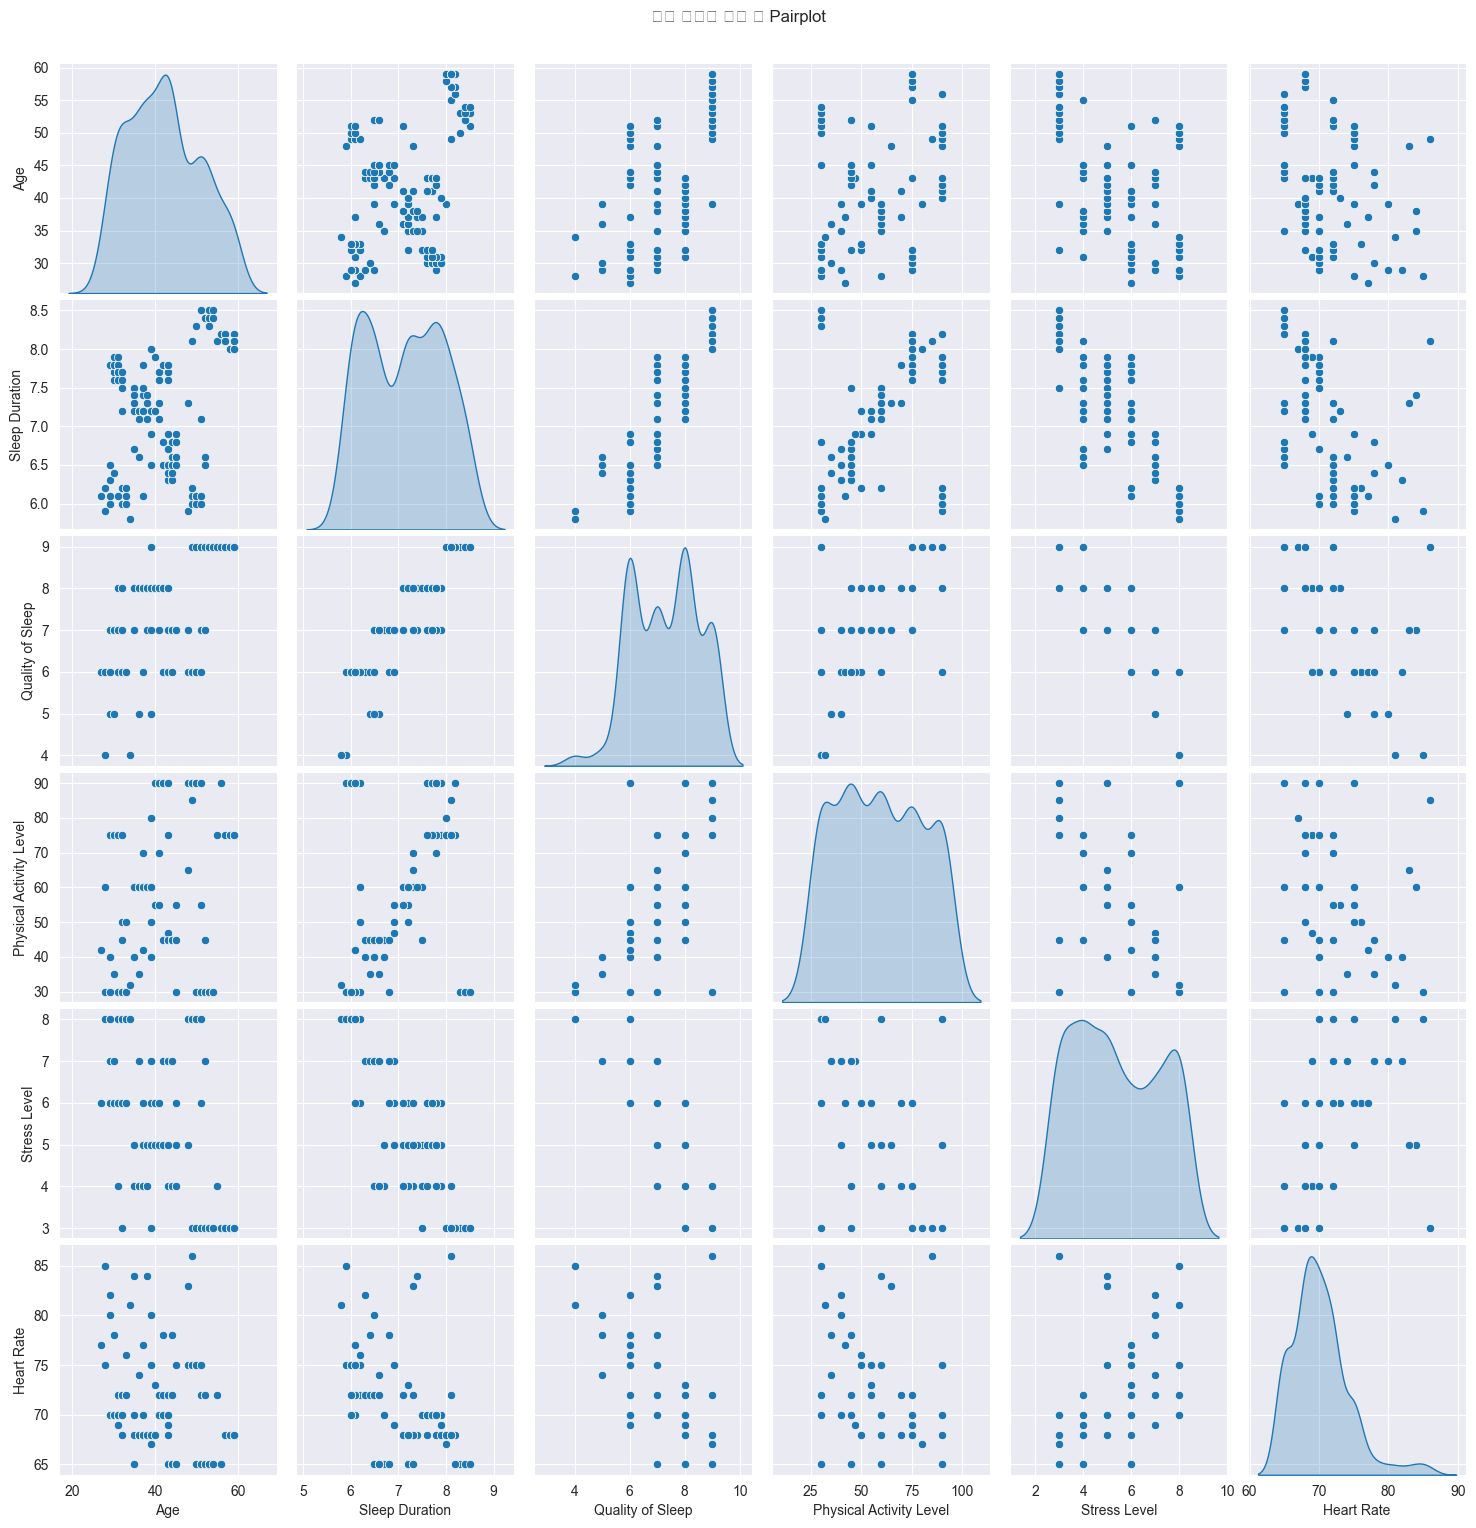

C:\Users\isdjf\AppData\Local\Temp\ipykernel_3224\4166707727.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sleep Disorder', y=col, data=df, palette='Set2')
C:\Users\isdjf\AppData\Local\Temp\ipykernel_3224\4166707727.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sleep Disorder', y=col, data=df, palette='Set2')
C:\Users\isdjf\AppData\Local\Temp\ipykernel_3224\4166707727.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sleep Disorder', y=col, data=df, palette='Set2')
C:\Users\isdjf\AppData\Local\Temp\ipykernel_3224\416

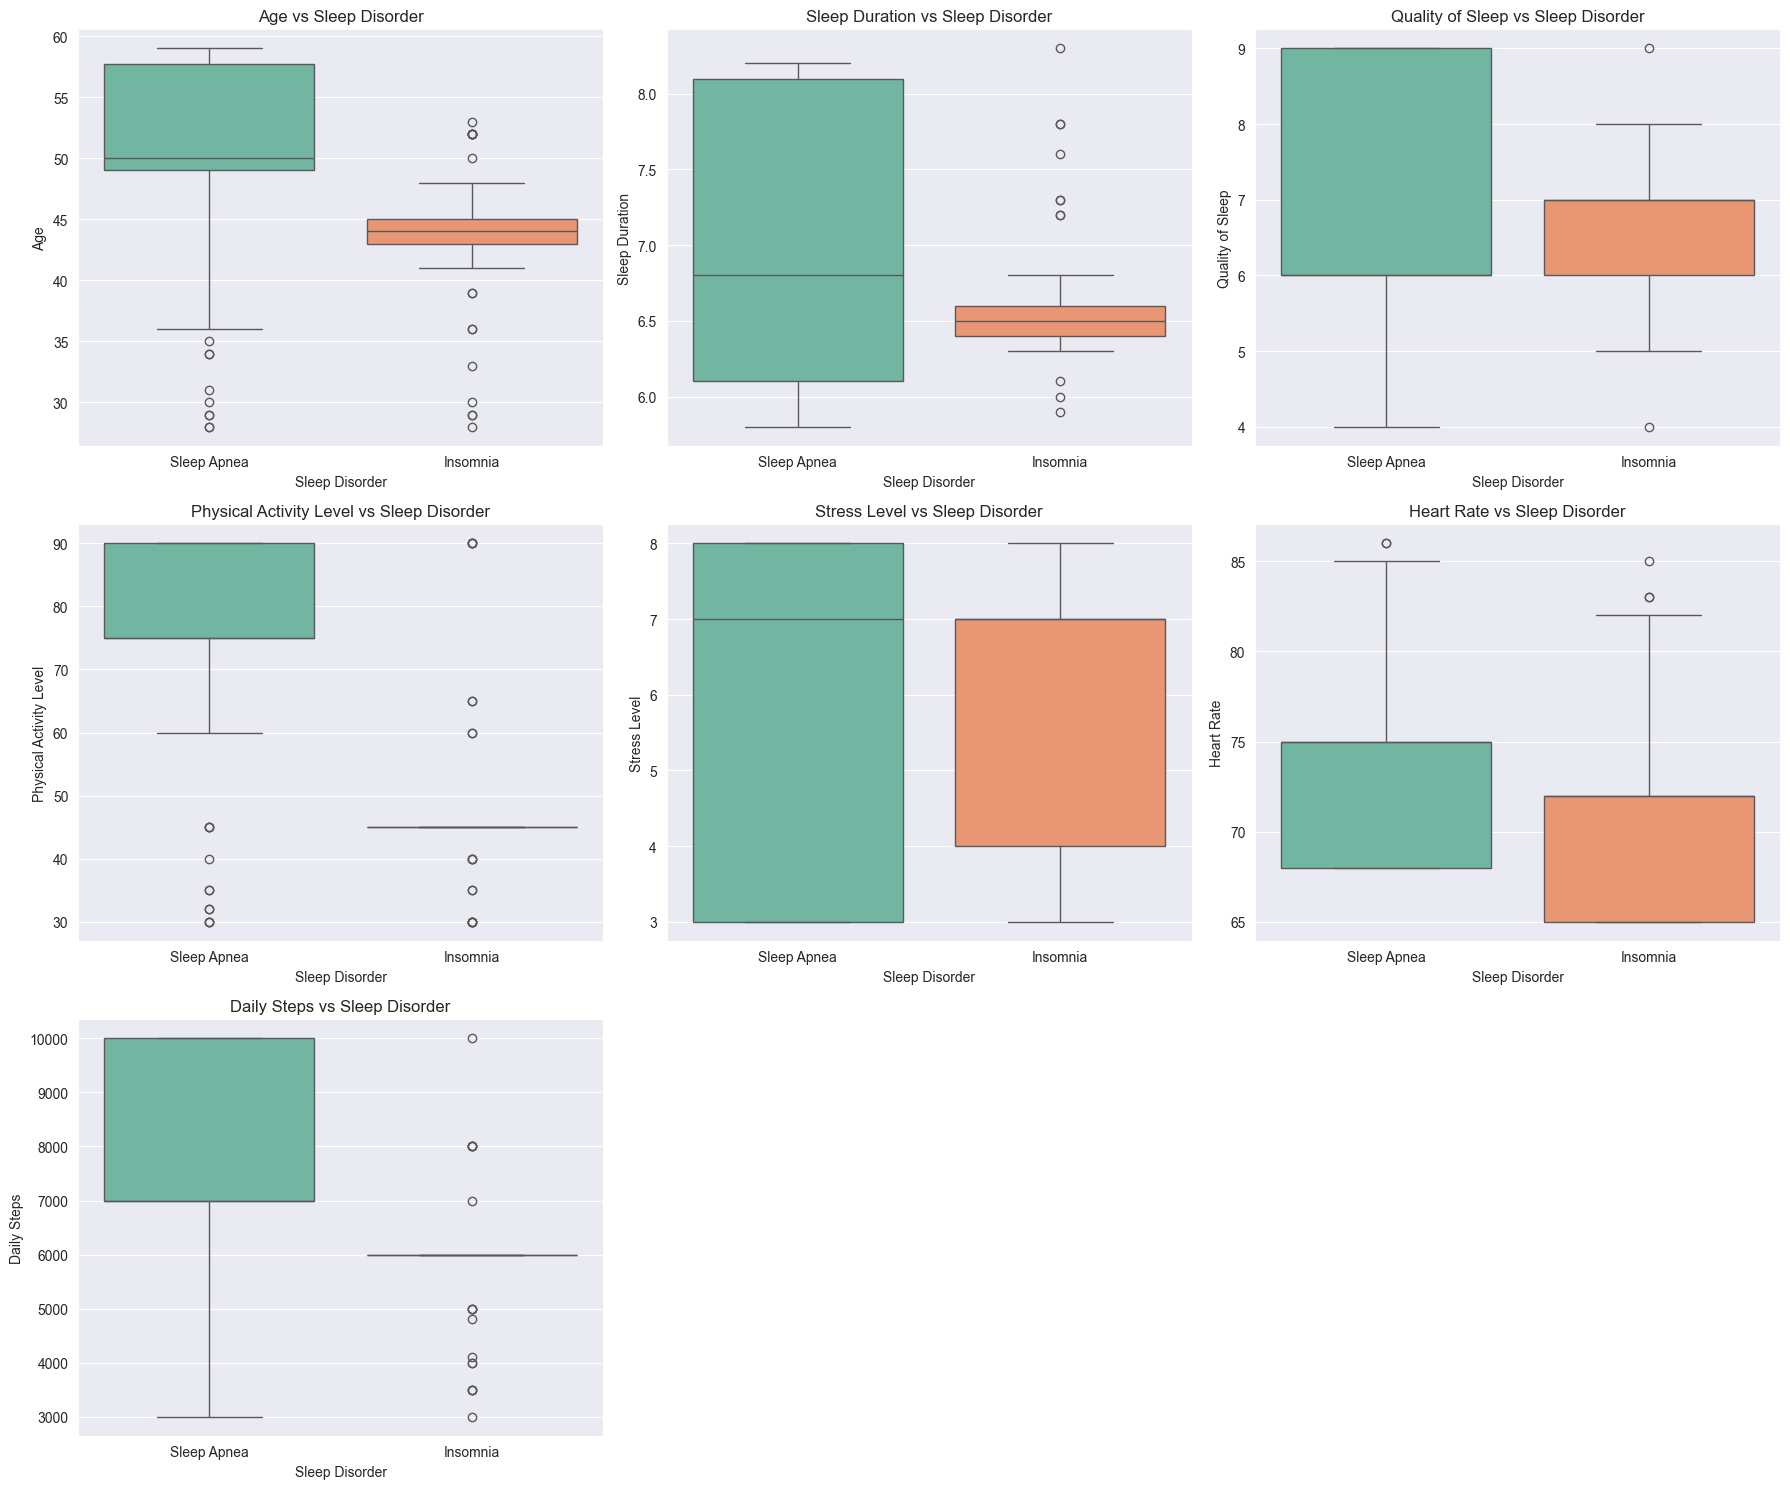

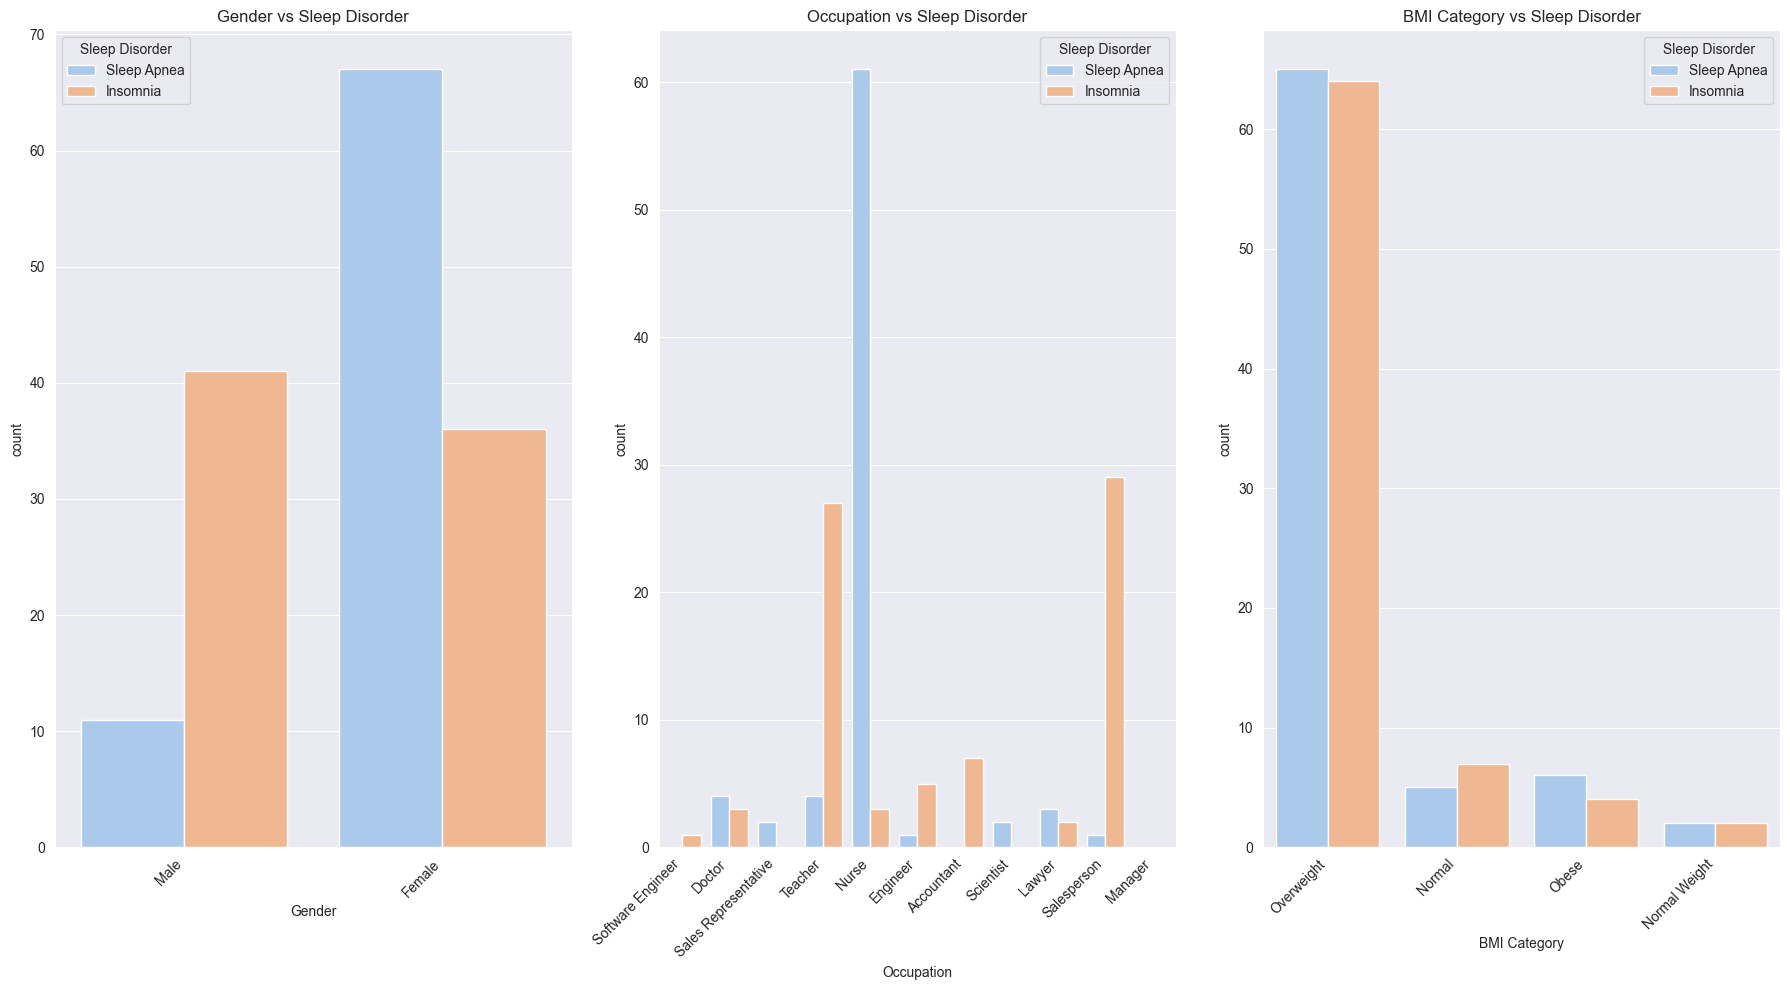

In [12]:
# 수치형 변수 간 Pairplot (일부 주요 변수 선택)
# Person ID는 숫자지만 의미가 없으므로 제외하고, Daily Steps도 스케일이 커서 제외
pairplot_cols = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate']
sns.pairplot(df[pairplot_cols], diag_kind='kde')
plt.suptitle('주요 수치형 변수 간 Pairplot', y=1.02)
plt.show()
print("\n" + "="*50 + "\n")


# 목표 변수(Sleep Disorder)와 주요 수치형 변수 간 관계 (Boxplot)
# numerical_cols는 04번 단계에서 Person ID가 제거된 상태로 정의되어 있어야 합니다.
num_numerical_cols_sd = len(numerical_cols) # 04번에서 이미 정의됨

# 그리드 크기를 동적으로 설정하거나 충분히 크게 설정
ncols_plot_sd = 3
nrows_plot_sd = (num_numerical_cols_sd + ncols_plot_sd - 1) // ncols_plot_sd

if num_numerical_cols_sd > 0:
    plt.figure(figsize=(6 * ncols_plot_sd, 5 * nrows_plot_sd)) # figsize도 동적으로 조절
    for i, col in enumerate(numerical_cols):
        plt.subplot(nrows_plot_sd, ncols_plot_sd, i + 1) # 수정된 부분
        sns.boxplot(x='Sleep Disorder', y=col, data=df, palette='Set2')
        plt.title(f'{col} vs Sleep Disorder')
    plt.tight_layout()
    plt.show()
else:
    print("분석할 수치형 변수가 없습니다.")
print("\n" + "="*50 + "\n")

# 목표 변수(Sleep Disorder)와 주요 범주형 변수 간 관계 (Countplot - hue 사용)
plt.figure(figsize=(18, 10))
categorical_features_for_relation = ['Gender', 'Occupation', 'BMI Category']
for i, col in enumerate(categorical_features_for_relation):
    plt.subplot(1, 3, i + 1) # 1x3 그리드로 배치
    sns.countplot(x=col, hue='Sleep Disorder', data=df, palette='pastel')
    plt.title(f'{col} vs Sleep Disorder')
    plt.xticks(rotation=45, ha='right') # x축 레이블 회전
plt.tight_layout()
plt.show()

## 7.상관관계 및 교차분석

C:\Users\isdjf\anaconda3\envs\ai_basic_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\isdjf\anaconda3\envs\ai_basic_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\isdjf\anaconda3\envs\ai_basic_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\isdjf\anaconda3\envs\ai_basic_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\isdjf\anaconda3\envs\ai_basic_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN

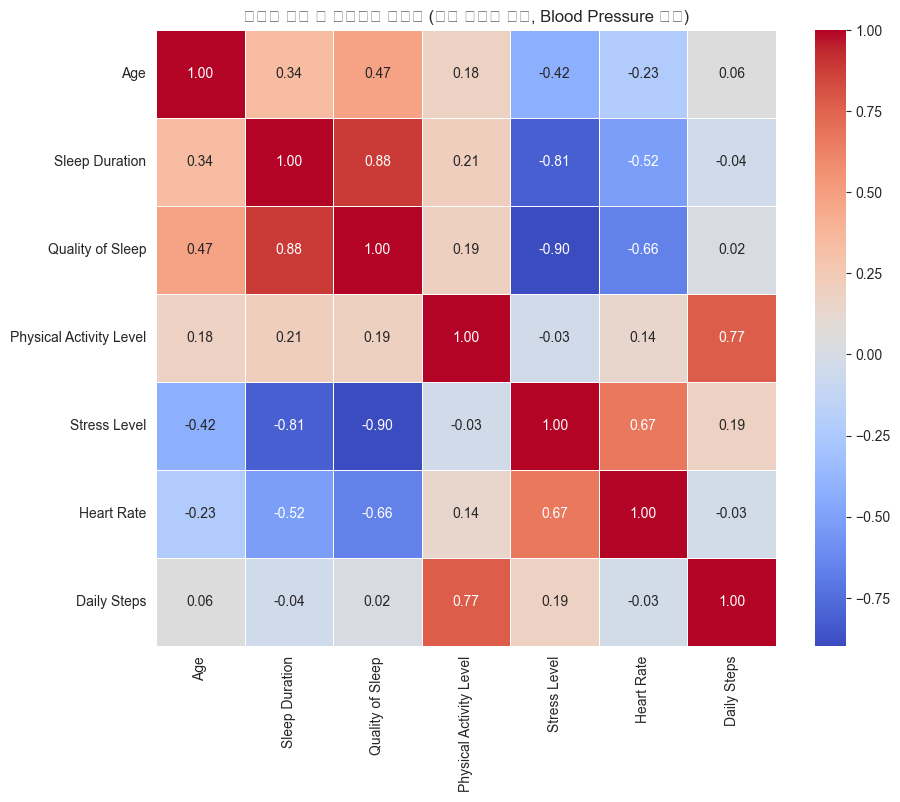



--- BMI Category vs Sleep Disorder (원본 데이터 기준) ---
Sleep Disorder  Insomnia  Sleep Apnea
BMI Category                         
Normal          0.583333     0.416667
Normal Weight   0.500000     0.500000
Obese           0.400000     0.600000
Overweight      0.496124     0.503876
All             0.496774     0.503226


--- Occupation vs Sleep Disorder (원본 데이터 기준) ---
Sleep Disorder        Insomnia  Sleep Apnea
Occupation                                 
Sales Representative  0.000000     1.000000
Scientist             0.000000     1.000000
Nurse                 0.046875     0.953125
Lawyer                0.400000     0.600000
Doctor                0.428571     0.571429
Engineer              0.833333     0.166667
Teacher               0.870968     0.129032
Salesperson           0.966667     0.033333
Accountant            1.000000     0.000000
Software Engineer     1.000000     0.000000


In [13]:
# 수치형 변수 간 상관관계 (Heatmap)
# Blood Pressure는 아직 문자열이므로, 이를 제외한 수치형 변수들로만 분석합니다.
# numerical_cols는 Person ID가 제외된 원본 df의 수치형 컬럼 리스트입니다.
numerical_cols_for_corr_original = df[numerical_cols].copy() # Person ID는 이미 제외됨

correlation_matrix_original = numerical_cols_for_corr_original.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_original, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('수치형 변수 간 상관관계 히트맵 (원본 데이터 기준, Blood Pressure 제외)')
plt.show()
print("\n" + "="*50 + "\n")

# 주요 범주형 변수와 목표 변수(Sleep Disorder) 간 교차분석 (Crosstab)
print("--- BMI Category vs Sleep Disorder (원본 데이터 기준) ---")
print(pd.crosstab(df['BMI Category'], df['Sleep Disorder'], margins=True, normalize='index')) # normalize='index' 로 행 기준 비율
print("\n" + "="*50 + "\n")

print("--- Occupation vs Sleep Disorder (원본 데이터 기준) ---")
crosstab_occupation_original = pd.crosstab(df['Occupation'], df['Sleep Disorder'], normalize='index')
print(crosstab_occupation_original.sort_values(by=['Sleep Apnea', 'Insomnia'], ascending=False).head(10)) # 수면무호흡증, 불면증 높은 순

## 8.데이터 전처리

In [14]:
# 원본 데이터프레임 복사하여 사용
df_processed = df.copy()

# 1. 'Person ID' 컬럼 제거 (모델링에 불필요)
if 'Person ID' in df_processed.columns: # 이미 제거되었을 수 있으므로 확인
    df_processed.drop('Person ID', axis=1, inplace=True)
    print("'Person ID' 컬럼 제거 완료.")
else:
    print("'Person ID' 컬럼은 이미 제거되었습니다.")


# 2. 'BMI Category' 통일: 'Normal Weight' -> 'Normal'
df_processed['BMI Category'] = df_processed['BMI Category'].replace('Normal Weight', 'Normal')
print("'BMI Category' 값 통일 완료: 'Normal Weight' -> 'Normal'")
print(df_processed['BMI Category'].value_counts())
print("\n" + "="*50 + "\n")

# 3. 'Occupation' 통일 (예: 'Salesperson' -> 'Sales Representative')
df_processed['Occupation'] = df_processed['Occupation'].replace('Salesperson', 'Sales Representative')
print("'Occupation' 값 통일 완료 (예시): 'Salesperson' -> 'Sales Representative'")
print(df_processed['Occupation'].value_counts().head()) # 상위 몇 개만 확인
print("\n" + "="*50 + "\n")


# 4. 'Blood Pressure' 컬럼 분리 (Systolic BP, Diastolic BP) 및 수치형 변환
if 'Blood Pressure' in df_processed.columns:
    bp_split = df_processed['Blood Pressure'].str.split('/', expand=True)
    df_processed['Systolic BP'] = pd.to_numeric(bp_split[0])
    df_processed['Diastolic BP'] = pd.to_numeric(bp_split[1])
    df_processed.drop('Blood Pressure', axis=1, inplace=True)
    print("'Blood Pressure' 컬럼을 'Systolic BP', 'Diastolic BP'로 분리 및 수치형 변환 완료.")
    print(df_processed[['Systolic BP', 'Diastolic BP']].head())
else:
    print("'Blood Pressure' 컬럼은 이미 처리되었거나 존재하지 않습니다.")

print("\n" + "="*50 + "\n")

# 전처리된 데이터 확인
print("전처리 후 데이터 정보:")
df_processed.info()
print("\n" + "="*50 + "\n")
print("전처리 후 데이터 샘플:")
print(df_processed.head())

'Person ID' 컬럼 제거 완료.
'BMI Category' 값 통일 완료: 'Normal Weight' -> 'Normal'
BMI Category
Normal        216
Overweight    148
Obese          10
Name: count, dtype: int64


'Occupation' 값 통일 완료 (예시): 'Salesperson' -> 'Sales Representative'
Occupation
Nurse       73
Doctor      71
Engineer    63
Lawyer      47
Teacher     40
Name: count, dtype: int64


'Blood Pressure' 컬럼을 'Systolic BP', 'Diastolic BP'로 분리 및 수치형 변환 완료.
   Systolic BP  Diastolic BP
0          126            83
1          125            80
2          125            80
3          140            90
4          140            90


전처리 후 데이터 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Durati

## 09.Feature Engineering

In [15]:
# 예시: 연령대(Age Group) 생성
# pd.cut을 사용하여 연령대 범주화
bins = [25, 35, 45, 55, 65] # 연령 구간 설정 (데이터의 최소, 최대값을 고려하여 설정)
labels = ['20-30대 초반', '30대 중후반-40대 초반', '40대 중후반-50대 초반', '50대 중후반 이상']
# df_processed['Age']의 min, max를 확인하여 bins 조정 필요 시 조정
# print(f"Min Age: {df_processed['Age'].min()}, Max Age: {df_processed['Age'].max()}")
# 현재 데이터셋의 Age 범위는 27~59이므로 bins는 적절
df_processed['Age Group'] = pd.cut(df_processed['Age'], bins=bins, labels=labels, right=False) # right=False: 왼쪽 경계 포함

print("파생 변수 'Age Group' 생성 완료.")
print(df_processed[['Age', 'Age Group']].head())
print("\n" + "="*50 + "\n")
print(df_processed['Age Group'].value_counts())
print("\n" + "="*50 + "\n")


# 예시: Stress to Sleep Quality Ratio
df_processed['Stress to Sleep Quality Ratio'] = df_processed['Stress Level'] / df_processed['Quality of Sleep']
print("파생 변수 'Stress to Sleep Quality Ratio' 생성 완료.")
print(df_processed[['Stress Level', 'Quality of Sleep', 'Stress to Sleep Quality Ratio']].head())

파생 변수 'Age Group' 생성 완료.
   Age  Age Group
0   27  20-30대 초반
1   28  20-30대 초반
2   28  20-30대 초반
3   28  20-30대 초반
4   28  20-30대 초반


Age Group
30대 중후반-40대 초반    168
40대 중후반-50대 초반     89
20-30대 초반          82
50대 중후반 이상         35
Name: count, dtype: int64


파생 변수 'Stress to Sleep Quality Ratio' 생성 완료.
   Stress Level  Quality of Sleep  Stress to Sleep Quality Ratio
0             6                 6                       1.000000
1             8                 6                       1.333333
2             8                 6                       1.333333
3             8                 4                       2.000000
4             8                 4                       2.000000


## 10.최종 요약 및 인사이트 도출

In [16]:
# 전처리 및 파생변수 생성된 데이터로 주요 통계 다시 확인
print("--- 최종 데이터 기술 통계 (수치형) ---")
print(df_processed.describe()) # df_processed에는 Systolic BP, Diastolic BP가 포함되어 있음
print("\n" + "="*50 + "\n")

# 수면 장애 유형별 주요 변수 평균값 비교
# df_processed에서 수치형 컬럼만 선택 (파생변수 포함)
numerical_cols_processed = df_processed.select_dtypes(include=np.number).columns.tolist()

# 필요시 특정 컬럼 제외 (예: 의미 없는 ID 컬럼 등. 현재는 Person ID 이미 제거됨)

print("--- 수면 장애 유형별 주요 변수 평균값 (전처리 및 파생변수 생성 후) ---")
# numerical_cols_for_summary 대신 numerical_cols_processed 사용
print(df_processed.groupby('Sleep Disorder')[numerical_cols_processed].mean().round(2))
print("\n" + "="*50 + "\n")


# 특정 직업군(예: Nurse)의 수면 관련 지표 확인
print("--- 직업군 'Nurse'의 수면 관련 지표 평균 (전처리 후) ---")
print(df_processed[df_processed['Occupation'] == 'Nurse'][numerical_cols_processed].mean().round(2))
print("\n" + "="*50 + "\n")

# BMI Category별 수면 장애 분포 (전처리 후)
print("--- BMI Category별 수면 장애 분포 (전처리 후) ---")
print(pd.crosstab(df_processed['BMI Category'], df_processed['Sleep Disorder'], normalize='index').round(3))

--- 최종 데이터 기술 통계 (수치형) ---
              Age  Sleep Duration  Quality of Sleep  Physical Activity Level  \
count  374.000000      374.000000        374.000000               374.000000   
mean    42.184492        7.132086          7.312834                59.171123   
std      8.673133        0.795657          1.196956                20.830804   
min     27.000000        5.800000          4.000000                30.000000   
25%     35.250000        6.400000          6.000000                45.000000   
50%     43.000000        7.200000          7.000000                60.000000   
75%     50.000000        7.800000          8.000000                75.000000   
max     59.000000        8.500000          9.000000                90.000000   

       Stress Level  Heart Rate   Daily Steps  Systolic BP  Diastolic BP  \
count    374.000000  374.000000    374.000000   374.000000    374.000000   
mean       5.385027   70.165775   6816.844920   128.553476     84.649733   
std        1.774526    4

# 수면 건강 및 생활 습관 데이터 EDA 레포트

## 1. 프로젝트 개요

-   **목적**: 개인의 성별, 나이, 직업, 생활 습관(수면 시간, 신체 활동, 스트레스 수준 등)과 건강 지표(BMI, 혈압, 심박수)가 수면 장애에 미치는 영향을 탐색적으로 분석하고, 주요 요인과 패턴을 파악한다.
-   **데이터 출처**: `Sleep_health_and_lifestyle_dataset.csv` (제공된 데이터)
-   **데이터 구성**: 총 374개 행, 초기 13개 컬럼. 전처리 후 `Person ID` 제거, `Blood Pressure`는 `Systolic BP`와 `Diastolic BP`로 분리, `Age Group` 및 `Stress to Sleep Quality Ratio` 파생 변수 추가. 최종 컬럼 수는 14개.

## 2. 데이터 기본 정보 확인

-   **총 데이터 수**: 374개
-   **전처리 후 컬럼 수**: 14개
-   **주요 컬럼 (전처리 후 기준)**:
    -   개인 정보: `Gender`, `Age`, `Occupation`, `Age Group`
    -   수면 관련: `Sleep Duration`, `Quality of Sleep`, `Sleep Disorder` (Target)
    -   생활 습관: `Physical Activity Level`, `Stress Level`, `Daily Steps`
    -   건강 지표: `BMI Category`, `Systolic BP`, `Diastolic BP`, `Heart Rate`, `Stress to Sleep Quality Ratio`
-   **데이터 타입**: 대부분 수치형(int, float) 및 범주형(object)으로 구성.

## 3. 기술 통계 및 데이터 요약

### 수치형 변수 (전처리 후 주요 변수 예시)

| 컬럼명                   | 평균    | 중앙값  | 표준편차 | 최솟값 | 최댓값 |
| ------------------------ | ------- | ------- | -------- | ------ | ------ |
| Age                      | 42.18   | 43.0    | 8.67     | 27.0   | 59.0   |
| Sleep Duration           | 7.13    | 7.2     | 0.79     | 5.8    | 8.5    |
| Quality of Sleep         | 7.32    | 7.0     | 1.20     | 4.0    | 9.0    |
| Physical Activity Level  | 59.17   | 60.0    | 20.83    | 30.0   | 90.0   |
| Stress Level             | 5.39    | 5.0     | 1.77     | 3.0    | 8.0    |
| Heart Rate               | 70.17   | 70.0    | 4.14     | 65.0   | 86.0   |
| Daily Steps              | 6816.84 | 7000.0  | 1617.92  | 3000.0 | 10000.0|
| **Systolic BP**          | 128.55  | 128.0   | 7.80     | 115.0  | 142.0  |
| **Diastolic BP**         | 84.63   | 85.0    | 6.00     | 75.0   | 95.0   |
| Stress to Sleep Quality Ratio | 0.77  | 0.75  | 0.30     | 0.33   | 2.00   |

### 범주형 변수 (전처리 후)

| 컬럼명         | 고유값 수 | 최빈값   | 분포 (상위 예시)                                      |
| -------------- | --------- | -------- | ----------------------------------------------------- |
| Gender         | 2개       | Male     | Male: 50.5%, Female: 49.5%                            |
| Occupation     | 11개      | Nurse    | Nurse: 19.5%, Doctor: 18.9%, Engineer: 16.8% ...      |
| BMI Category   | 3개       | Normal   | Normal: 58.0% (Normal Weight 포함), Overweight: 39.6% ... |
| Sleep Disorder | 3개       | None     | None: 58.6%, Sleep Apnea: 20.9%, Insomnia: 20.6%     |
| Age Group      | 4개       | 30대 중후반-40대 초반 | 30대 중후반-40대 초반: 45.5%, 40대 중후반-50대 초반: 26.5% ... |

## 4. 결측치 및 이상치 탐색

-   **결측치**: 분석된 데이터셋에는 결측치가 존재하지 않았음.
-   **이상치**: 수치형 변수들의 Boxplot 검토 결과, 대부분의 데이터는 합리적인 범위 내에 분포. `Daily Steps` 등에서 일부 높은 값이 관찰되었으나, 실제 가능한 활동량으로 판단. `Physical Activity Level`과 `Daily Steps`는 특정 값에 집중되는 경향이 있어, 수집 방식(선택형 응답 등)의 영향일 수 있음.

## 5. 변수 간 관계 분석

-   **수면 시간과 수면의 질**: 강한 양의 상관관계 (0.88). 수면 시간이 길수록 수면의 질이 높은 경향.
-   **스트레스 수준과 수면의 질**: 강한 음의 상관관계 (-0.90). 스트레스가 높을수록 수면의 질이 낮은 경향. (전처리 후 데이터로 상관관계 재확인 시에도 유사)
-   **BMI와 수면 장애**: 'Obese' BMI 범주에서 수면 무호흡증 비율이 약 66%로 매우 높게 나타남. 'Overweight'에서도 수면 무호흡증(32%)과 불면증(35%) 비율이 높음.
-   **직업과 수면 장애**:
    -   'Nurse': 수면 무호흡증(45%), 불면증(19%)으로 다른 직업군에 비해 높은 편.
    -   'Sales Representative': 수면 무호흡증(66%), 불면증(33%)으로 매우 높은 편.
    -   'Doctor', 'Engineer', 'Lawyer' 등은 상대적으로 수면 장애가 없는('None') 비율이 높음.
-   **수면 장애 유형별 특징**:
    -   **불면증**: 가장 짧은 수면 시간, 가장 낮은 수면의 질, 가장 높은 스트레스 수준.
    -   **수면 무호흡증**: 평균 연령이 높고, BMI가 높으며, 평균 수축기/이완기 혈압 및 심박수가 높은 경향.

## 6. 파생 변수 생성 및 전처리

-   `Person ID`: 분석에 불필요하여 제거.
-   `BMI Category`: 'Normal Weight'를 'Normal'로 통합하여 일관성 확보.
-   `Occupation`: 'Salesperson'을 'Sales Representative'로 통합.
-   `Blood Pressure`: 문자열('systolic/diastolic')에서 `Systolic BP`와 `Diastolic BP` 두 개의 수치형 컬럼으로 분리.
-   `Age Group`: 연령을 구간화하여 새로운 범주형 변수 생성 ('20-30대 초반', '30대 중후반-40대 초반', '40대 중후반-50대 초반', '50대 중후반 이상').
-   `Stress to Sleep Quality Ratio`: `Stress Level` / `Quality of Sleep`으로 계산하여 스트레스 대비 수면의 질을 나타내는 지표 생성.

## 7. 요약 및 인사이트

-   **주요 위험 요인**: 높은 스트레스 수준, 높은 BMI(특히 'Obese'), 특정 직업군(예: Nurse, Sales Representative)은 수면 장애(불면증, 수면 무호흡증)와 강한 연관성을 보임.
-   **보호 요인**: 충분한 수면 시간, 높은 수면의 질, 적절한 신체 활동 수준은 수면 건강에 긍정적인 영향을 미치는 것으로 나타남.
-   **수면 장애 특성**: 불면증은 주로 심리적 요인(스트레스)과 수면의 질 저하와 관련되며, 수면 무호흡증은 신체적 요인(높은 BMI, 연령, 높은 혈압)과 더 관련이 깊어 보임.
-   **향후 분석 방향**:
    -   수면 장애 예측 모델 개발 시, 본 EDA에서 도출된 주요 변수들(`Stress Level`, `BMI Category`, `Occupation`, `Age`, `Sleep Duration`, `Quality of Sleep`, `Systolic BP`, `Diastolic BP` 등)을 중요 피처로 활용 가능.
    -   직업군별 세부 분석을 통해 근무 환경(교대 근무 여부, 근무 시간 등)이 수면 건강에 미치는 영향 심층 연구.
    -   개인 맞춤형 수면 건강 증진 전략 수립 시, BMI 관리, 스트레스 관리, 규칙적인 신체 활동의 중요성을 강조.

---